# Kelly criterion

In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import random as rand

In [3]:
def isWin(p=0.6):
    r = rand.random()
    if r < p:
        return True
    else:
        return False

In [4]:
def kelly_fraction(p, g):
    q = 1.0 - p
    f = (g*p - q)/g
    return f

In [5]:
def run_game(f=0.1, p=0.6, odds=1.2, initial=1000, throws=1000):
    bankroll = initial
    i = 0
    while bankroll > 0 and (i < throws):
        bet = f*bankroll
        if isWin(p=p):
            win = odds*bet
            bankroll = bankroll + win
        else:
            bankroll = bankroll - bet
        i = i + 1
    return bankroll

In [6]:
draws = [isWin() for i in range(1000)]

In [7]:
np.mean(draws)

0.61099999999999999

In [8]:
run_game()

15243571504808.021

In [9]:
fractions = np.linspace(1e-2, 1.0, 50)

In [10]:
p = 0.52
odds = 2
initial = 1000

In [11]:
returns = [run_game(f, p, odds, initial) for f in fractions]
f_kelly = kelly_fraction(p, odds)

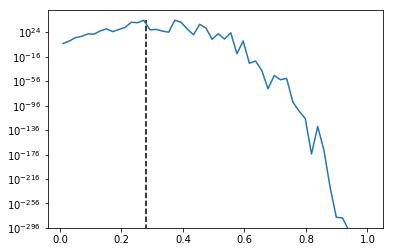

In [12]:
f,a = plt.subplots()
a.plot(fractions, returns)
a.set_yscale('log')
a.vlines(f_kelly, ymin=np.min(returns), ymax=np.max(returns), linestyles='--', label='Kelly')